In [1]:
import pandas as pd

In [2]:

data = pd.read_csv('./export (11).csv')
data.columns

Index(['Address', 'Name', 'Is delegator', 'Avatar', 'Space', 'Ens name',
       'Follow Count', 'Follows Space', 'Total Votes', 'Proposal Interaction',
       'Proposal Interaction In Space',
       'Proposal Interaction outside of Space', 'Total NFT`s',
       'Total Rewards NFT`s', 'User is delegator'],
      dtype='object')

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Read the data from the CSV file
data_file = './export (11).csv'
df = pd.read_csv(data_file)

# Define the target variable
target_column = 'Score'

# Define the number of intervals for each column
num_intervals = 3  # You can adjust this as needed

# Function to calculate the scores for each interval based on the mean of the data in that interval
def calculate_scores(column_data, intervals):
    kmeans = KMeans(n_clusters=len(intervals), init='k-means++', random_state=42)
    kmeans.fit(column_data.values.reshape(-1, 1))
    cluster_centers = sorted(kmeans.cluster_centers_.flatten())
    scores = [0] + cluster_centers[:-1] + [100]
    return scores

# Calculate the intervals and scores for each column
for column in df.columns:
    if column != target_column:
        # Convert the column data to numeric and set non-numeric values to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')

        # Drop rows with NaN values
        df.dropna(subset=[column], inplace=True)

        # Filter out NaN values and convert unique values to numeric type
        unique_values = df[column].unique()

        # Remove duplicates and sort unique values
        unique_values = np.unique(unique_values)

        # Check if there are any valid unique values to calculate intervals and scores
        if len(unique_values) > 0:
            # Calculate the intervals based on equal-width binning
            intervals = pd.cut(unique_values, bins=num_intervals, include_lowest=True).categories
            intervals = [interval.right for interval in intervals]
            intervals.append(float('inf'))  # Add infinity as the last interval

            # Calculate the scores for each interval using clustering approach
            scores = calculate_scores(df[column], intervals)

            # Assign the intervals and scores to the DataFrame
            df[column + ' Interval'] = intervals[:num_intervals + 1]
            df[column + ' Score'] = scores

# Display the resulting DataFrame with the intervals and scores
print(df)


Empty DataFrame
Columns: [Address, Name, Is delegator, Avatar, Space, Ens name, Follow Count, Follows Space, Total Votes, Proposal Interaction, Proposal Interaction In Space, Proposal Interaction outside of Space, Total NFT`s, Total Rewards NFT`s, User is delegator]
Index: []


/var/folders/yc/x90wh_kn09v92yybd6xj3p4h0000gn/T/ipykernel_35616/3485749203.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


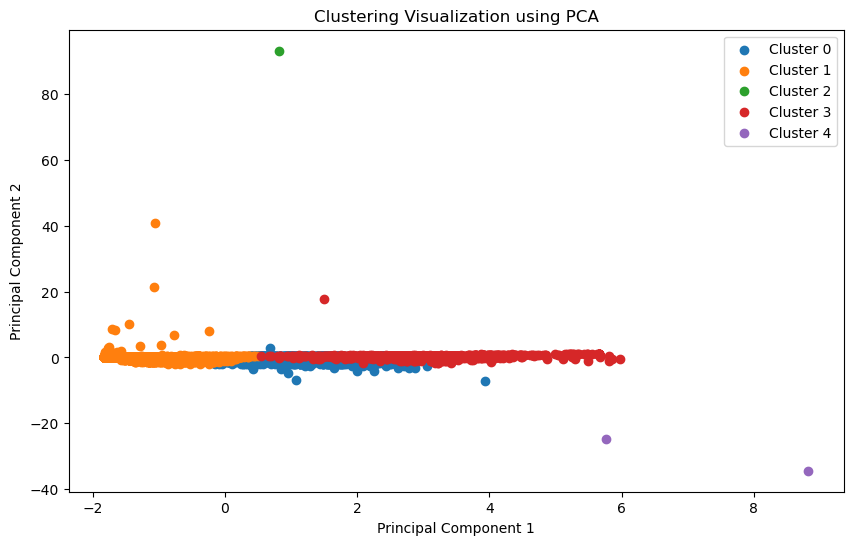

In [37]:
# Feature Selection
selected_features = ['Follow Count', 'Total Votes', 'Total NFT`s', 'Proposal Interaction', 'Total Rewards NFT`s']

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
df = pd.read_csv('./export (11).csv')

# Preprocessing
# Convert 'Address' column to a numerical representation if needed

# Exclude non-numeric columns from normalization
non_numeric_cols = ['Address', 'Name', 'Avatar', 'Space', 'Ens name']
numerical_cols = df.columns.drop(non_numeric_cols)

# Normalize numerical columns (except 'Address')
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Handle missing values
# If a column has missing values, fill them with the mean of that column
df.fillna(df.mean(), inplace=True)

# Feature Selection
selected_features = ['Follow Count', 'Total Votes', 'Total NFT`s', 'Proposal Interaction', 'Total Rewards NFT`s']  # Add relevant columns

# ML Clustering
n_clusters = 5  # Choose the number of clusters based on your dataset and problem
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[selected_features])

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df[selected_features])

# Create a DataFrame for the reduced features and add the cluster information
df_reduced = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])
df_reduced['Cluster'] = df['Cluster']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for cluster_num in range(n_clusters):
    plt.scatter(
        df_reduced.loc[df_reduced['Cluster'] == cluster_num, 'PC1'],
        df_reduced.loc[df_reduced['Cluster'] == cluster_num, 'PC2'],
        label=f'Cluster {cluster_num}',
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization using PCA')
plt.legend()
plt.show()
